            Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve,roc_auc_score


import warnings
warnings.filterwarnings("ignore")

            Importing data

In [27]:
data = pd.read_csv("C:/Datasets/diabetes.csv")
print("Data shape :",data.shape)
data.head()



Data shape : (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


            EDA

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


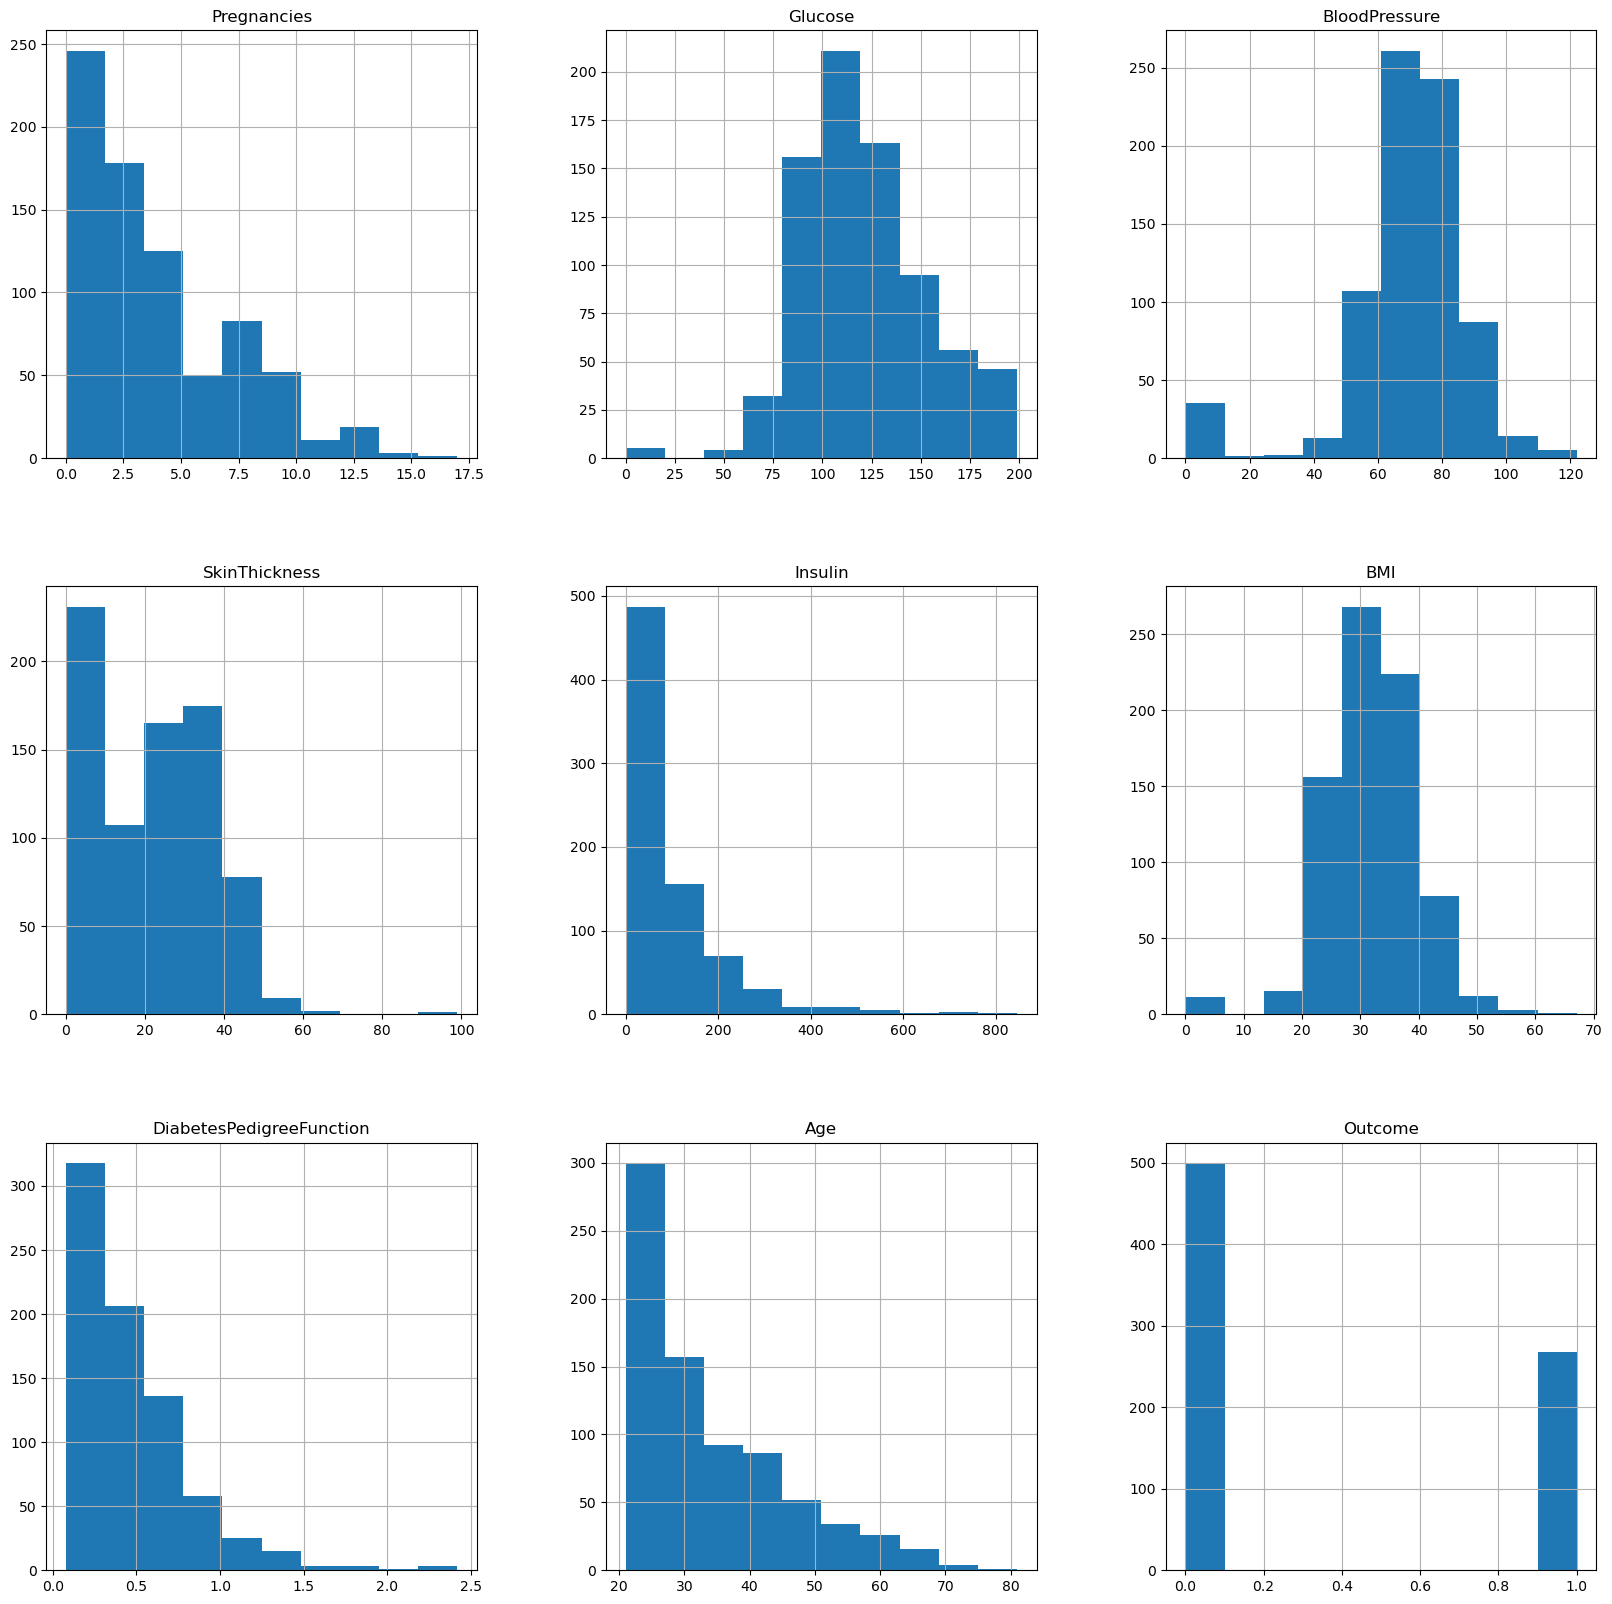

In [30]:
data.hist(figsize=(20,20))
plt.show()

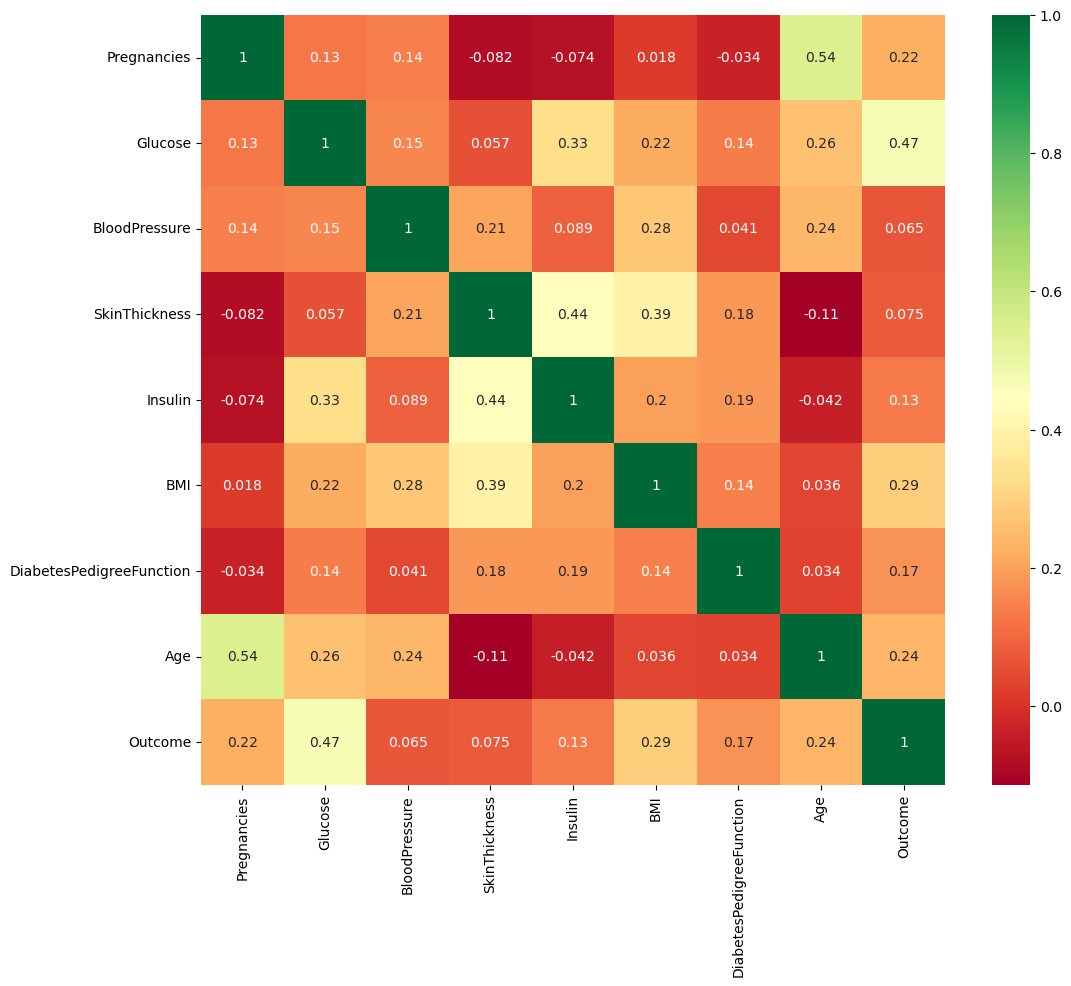

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')
plt.show()

In [31]:
X = data.copy()
X = X.drop("Outcome", axis=1)

In [32]:
Scaler = StandardScaler()
X = pd.DataFrame(Scaler.fit_transform(X),columns = X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [33]:
y = data.Outcome

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

                    Finding best k using cross_val_score

The optimal k value is 19.
------------------------


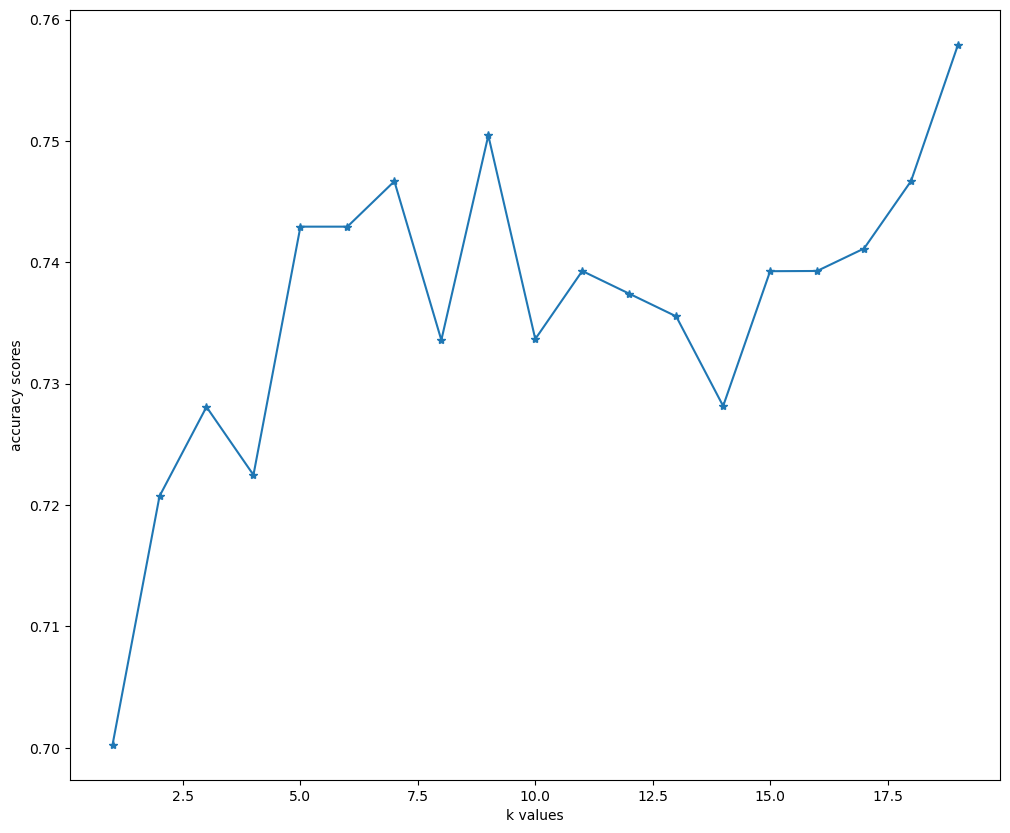

In [35]:
k_values = [i for i in range(1,20)]
k_accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy')
    k_accuracy_scores.append(score.mean())
best_k_accuracy_scores = max(k_accuracy_scores)
best_k = k_values[k_accuracy_scores.index(best_k_accuracy_scores)]


print("The optimal k value is {}.".format(best_k))

print("------------------------")
plt.figure(figsize=(12,10))
plt.plot(k_values,k_accuracy_scores, marker = '*')
plt.xlabel("k values")
plt.ylabel("accuracy scores")
plt.show()

In [46]:
knn = KNeighborsClassifier(best_k)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7186147186147186

In [47]:
y_pred = knn.predict(X_test)

        Model evaluation

Confusion matrix


![Alt text](Images/confusion_matrix.PNG)

In [48]:
confusion_matrix(y_test, y_pred)

array([[125,  11],
       [ 54,  41]], dtype=int64)

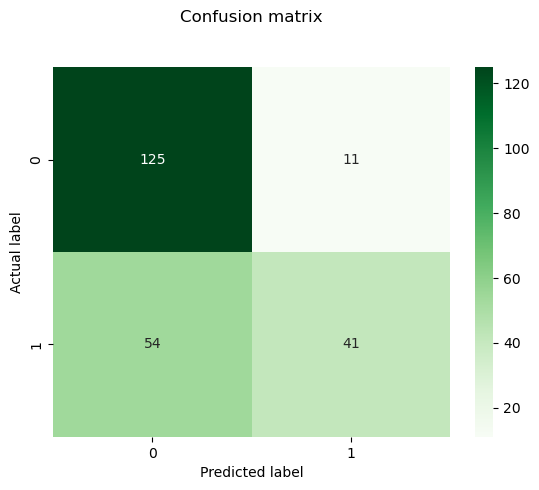

In [49]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens",fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

0.8105263157894738


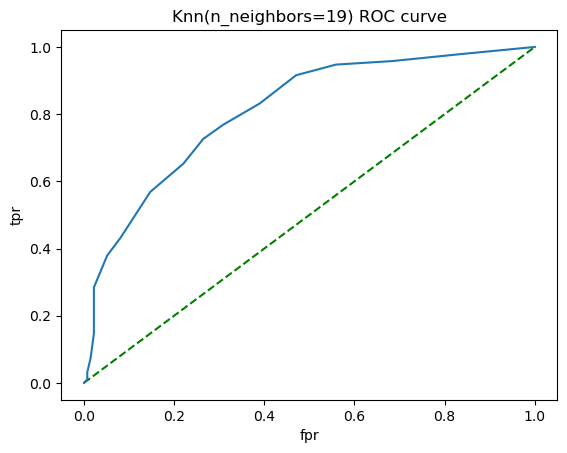

In [50]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(roc_auc_score(y_test,y_pred_proba))
plt.plot([0,1],[0,1],'g--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors={}) ROC curve'.format(best_k))
plt.show()


        Patient prediction

In [51]:
Random_patient = np.array((2, 90, 68, 20, 0, 29.1, 0.251 ,30))
Random_patient = Random_patient.reshape(1,-1)
Test_prediction = knn.predict(Random_patient)
print("The patient belong to the", Test_prediction[0], "class")

The patient belong to the 1 class


        Optimization

In [52]:
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.757926618206992
Best Parameters: {'n_neighbors': 19}
